In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

Method to fit model and get predicted values

In [3]:
def model(X,Y):
    model = sm.OLS(Y,sm.add_constant(X))
    results = model.fit()
    print(results.summary())
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=10,test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    scores = cross_val_score(lr, X_test,y_test, cv=2)
    print(" ****Score********* "+ str(lr.score(X_test,y_test)))
    print(" ****Intercept***** "+str(lr.intercept_))
    print(" ****Coefficient*** "+str(lr.coef_))
    print(" ****Cross Validation Score********* "+ str(scores))
    predictions =lr.predict(X_test)
    pred_df =pd.DataFrame({'y_test':y_test,'Predictions':predictions})
    return pred_df

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


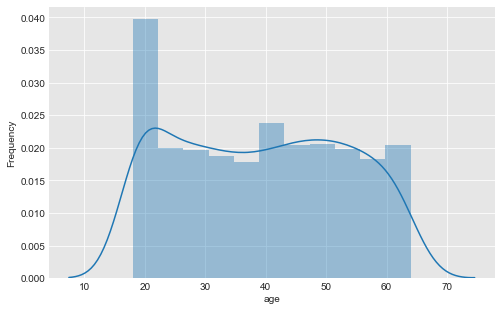

In [7]:
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(df['age'])
ax.set_ylabel('Frequency')
plt.show()

**Observations:**
Young people took more health insurances than older. It is effecting dependent variable.

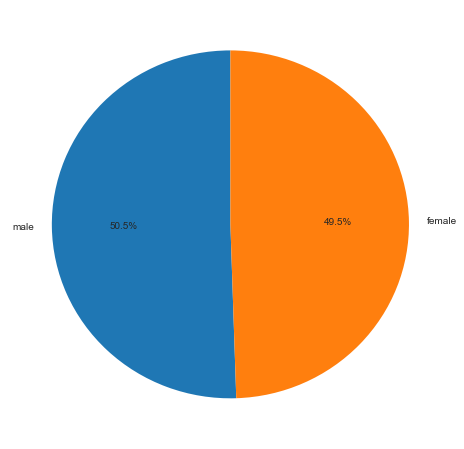

In [8]:
fig = plt.figure(figsize=(8,8))
df2=pd.DataFrame(df['sex'].value_counts())
plt.pie(df2['sex'],autopct='%1.1f%%',labels=df2.index,startangle=90)
plt.show()

**Observations:**
There was no effect on output with sex variable as it is equally distubuted. It is not effecting dependent variable.

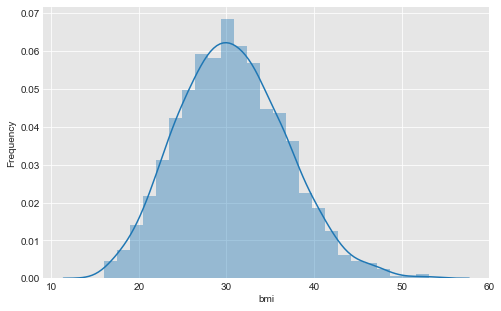

In [9]:
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(df['bmi'])
ax.set_ylabel('Frequency')
plt.show()

**Observations:**
* Health insurances were high when bmi closes to 30. It is effecting dependent variable.

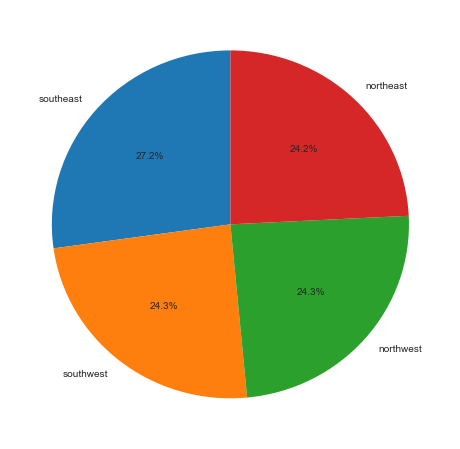

In [10]:
fig = plt.figure(figsize=(8,8))
df3=pd.DataFrame(df['region'].value_counts())
plt.pie(df3['region'],autopct='%1.1f%%',labels=df3.index,startangle=90)
plt.show()

**Observations:**
There was no effect on output with region variable as it is equally distubuted. It is not effecting dependent variable.

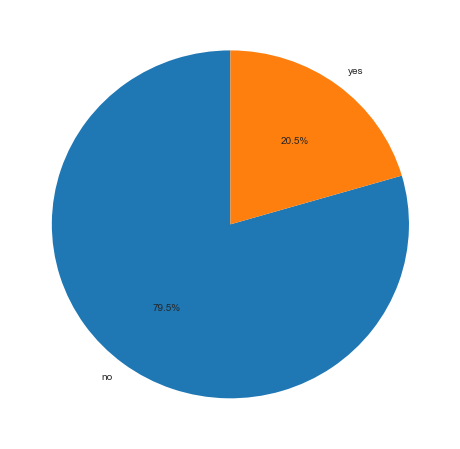

In [11]:
fig = plt.figure(figsize=(8,8))
df4=pd.DataFrame(df['smoker'].value_counts())
plt.pie(df4['smoker'],autopct='%1.1f%%',labels=df4.index,startangle=90)
plt.show()

**Observations:**
* non-smokers took more Health insurances than smoker. It is effecting dependent variable.

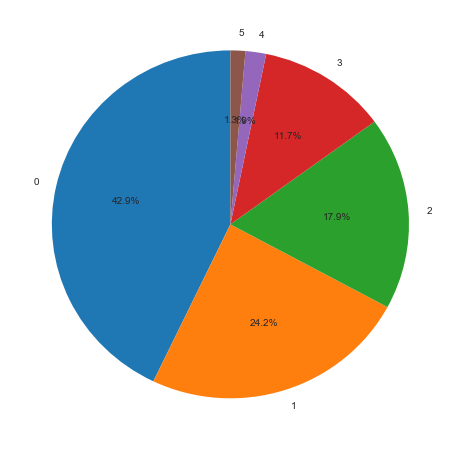

In [12]:
fig = plt.figure(figsize=(8,8))
df5=pd.DataFrame(df['children'].value_counts())
plt.pie(df5['children'],autopct='%1.1f%%',labels=df5.index,startangle=90)
plt.show()

**Observations:**
* Member without children took more Health insurances. It is effecting dependent variable.

<Figure size 576x576 with 0 Axes>

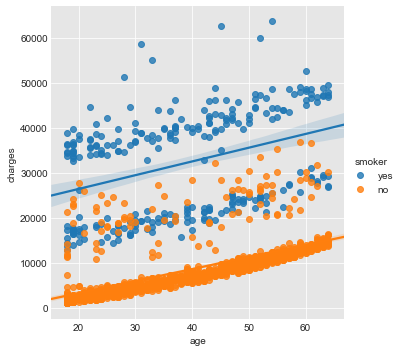

In [13]:
fig = plt.figure(figsize=(8,8))
sns.lmplot(x='age',y='charges',data=df,hue='smoker')
plt.show()

**Observations:**
* age is correlated with output irrespective of smoker or non-smoker

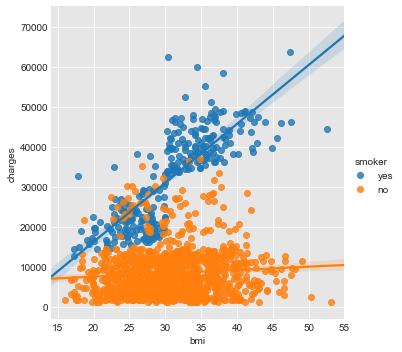

In [14]:
sns.lmplot(x='bmi',y='charges',data=df,hue='smoker')

**Observations:**
* bmi is highly correlated with output when person is smoker
* bmi is not correlated with output when person is nonsmoker

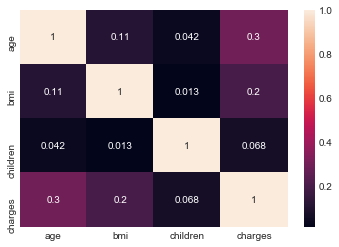

In [15]:
sns.heatmap(df.corr(),annot=True)

**Observations:**
* There was no stong correlation between variables

Dropping sex and region as it not impacting output

In [16]:
df.drop(labels=['region','sex'],axis=1,inplace=True)

In [17]:
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
insurance_df = pd.get_dummies(data=df,columns=['smoker'],drop_first=True)
insurance_df['Charges']=insurance_df['charges']
insurance_df.drop(labels='charges',inplace=True,axis=1)

In [20]:
insurance_df.head()

,age,bmi,children,smoker_yes,Charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


**Before going to create a model lets find which variable effects output the most.**

In [21]:
def model_params(X,Y) :
    col = X.name
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    rsq = round(results.rsquared,4)
    rsquared[col]=rsq
    adj_rsq = round(results.rsquared_adj,4)
    adj_rsquared[col]=adj_rsq
    pvalue = round(results.pvalues,4)
    pvalues[col]=pvalue[1]
cols= insurance_df.iloc[:,:-1].columns.values
y = insurance_df.iloc[:,-1]
pvalues = {}
rsquared = {}
adj_rsquared = {}
for i in range(0,len(cols)) :
    model_params(insurance_df[cols[i]],y)
df_params = pd.DataFrame(np.row_stack([pd.DataFrame(rsquared,index=[0]),pd.DataFrame(adj_rsquared,index=[0]),pd.DataFrame(pvalues,index=[0])]),columns=cols,index=['r_sq','adj_rsq','pvalue'])

In [22]:
df_params

,age,bmi,children,smoker_yes
r_sq,0.0894,0.0393,0.0046,0.6198
adj_rsq,0.0887,0.0386,0.0039,0.6195
pvalue,0.0000,0.0000,0.0129,0.0000


**Observations:**
* If we observe r_seq & adj_rsq values, smoke variable effects dependent variable the most.

**Model 1:**
* Create model with full data

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 28 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:17:35   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

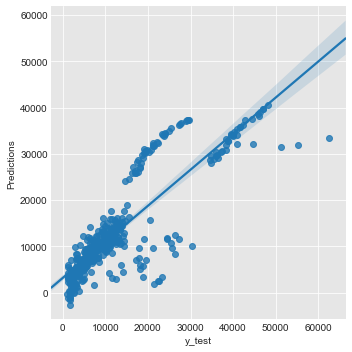

In [23]:
X =insurance_df.iloc[:,:-1]
Y = insurance_df.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we didnot see much accuracy when we are predicting the model with full data.
* model score: 0.7166354165086463

**Model 2:**
* As smoke variable effects the output most. Lets devide the data by smoke or nonsmoke and remove outliers from it.

In [24]:
insurance_smoker = insurance_df[insurance_df['smoker_yes']==1]

In [25]:
insurance_nonsmoker = insurance_df[insurance_df['smoker_yes']==0]

**Model 2.1 : Smoker**

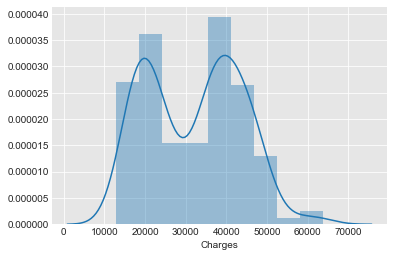

In [26]:
sns.distplot(insurance_smoker['Charges'])

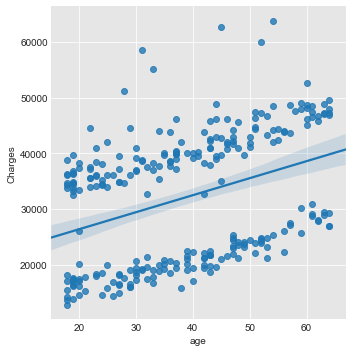

In [27]:
sns.lmplot(x='age',y='Charges',data=insurance_smoker)

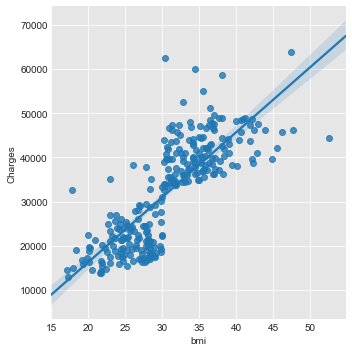

In [28]:
sns.lmplot(x='bmi',y='Charges',data=insurance_smoker)

**Observations:**

If we observe patterns in the data, Charges is not normally distibuted. Hence, We can futher divide data based on bmi to get the data into normal distibution.

Lets divide smoker data by bmi
* bmi <= 30 to 1 set
* bmi >30 to another set

In [29]:
insurance_smoker1 = insurance_smoker[insurance_smoker['bmi']<=30]
insurance_smoker2 = insurance_smoker[(insurance_smoker['bmi']>30)]

In [30]:
insurance_smoker1.shape

(130, 5)

**Model 2.1.1:** 
* bmi less than or equal to 30

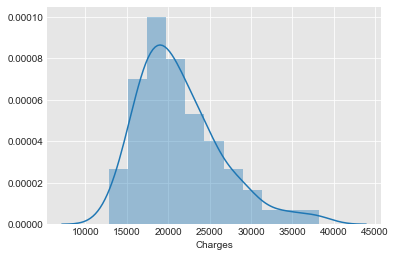

In [31]:
sns.distplot(insurance_smoker1['Charges'])
plt.show()

**Observation:** Now we can see data is normally distibuted.

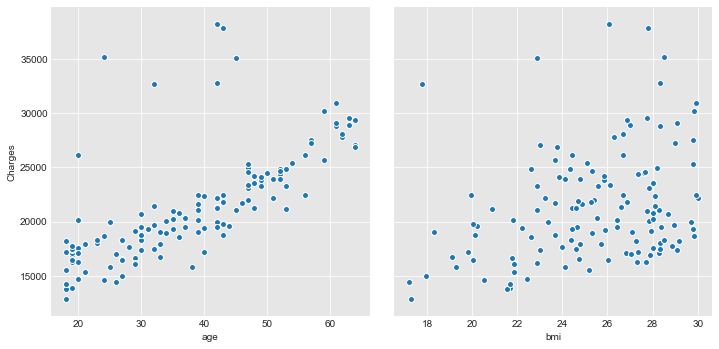

In [32]:
sns.pairplot(data=insurance_smoker1,x_vars=['age','bmi'],y_vars=['Charges'],size=5)
plt.show()

Outliers:

In [33]:
insurance_smoker1[insurance_smoker1['Charges']>30000]

,age,bmi,children,smoker_yes,Charges
92,59,29.830,3,1,30184.93670
103,61,29.920,3,1,30942.19180
128,32,17.765,2,1,32734.18630
476,24,28.500,0,1,35147.52848
524,42,26.070,1,1,38245.59327
641,42,28.310,3,1,32787.45859
917,45,22.895,0,1,35069.37452
1303,43,27.800,0,1,37829.72420


In [34]:
outlier1 =insurance_smoker1[insurance_smoker1['Charges']>30000].shape[0]

In [35]:
outlier1

8

Removing ouliers in data

In [36]:
insurance_smoker1.drop(index=insurance_smoker1[insurance_smoker1['Charges']>30000].index,axis=1,inplace=True)

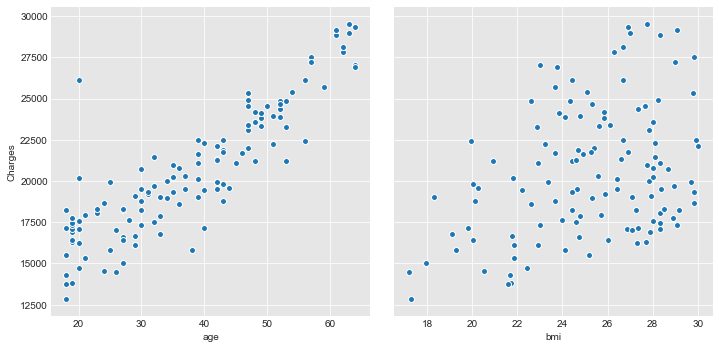

In [37]:
sns.pairplot(data=insurance_smoker1,x_vars=['age','bmi'],y_vars=['Charges'],size=5)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     304.7
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           2.23e-55
Time:                        23:17:39   Log-Likelihood:                -1049.1
No. Observations:                 122   AIC:                             2106.
Df Residuals:                     118   BIC:                             2117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4124   1078.688      0.040      0.9

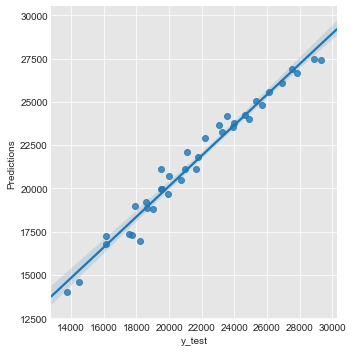

In [38]:
X =insurance_smoker1.iloc[:,:-1].drop(labels=['smoker_yes'],axis=1)
Y = insurance_smoker1.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we saw great accuracy when we are predicting the model using smoker and bmi <=30
* model score: 0.9623848866708914

**Model 2.1.2:** 
* bmi greater than 30

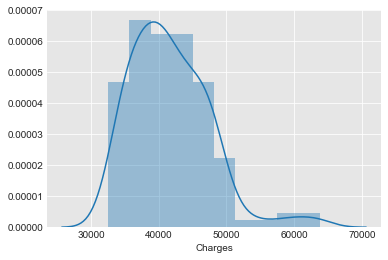

In [39]:
sns.distplot(insurance_smoker2['Charges'])

**Observation:** Now we can see data is normally distibuted.

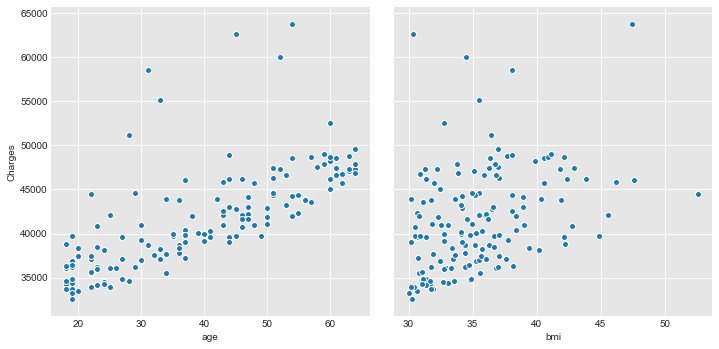

In [40]:
sns.pairplot(data=insurance_smoker2,x_vars=['age','bmi'],y_vars=['Charges'],size=5)
plt.show()

Outliers:

In [41]:
insurance_smoker2[insurance_smoker2['Charges']>50000]

,age,bmi,children,smoker_yes,Charges
34,28,36.400,1,1,51194.55914
543,54,47.410,0,1,63770.42801
577,31,38.095,1,1,58571.07448
819,33,35.530,0,1,55135.40209
1146,60,32.800,0,1,52590.82939
1230,52,34.485,3,1,60021.39897
1300,45,30.360,0,1,62592.87309


In [42]:
outliers2 =insurance_smoker2[insurance_smoker2['Charges']>50000].shape[0]

In [43]:
outliers2

7

Removing outliers in data

In [44]:
insurance_smoker2.drop(index=insurance_smoker2[insurance_smoker2['Charges']>50000].index,axis=1,inplace=True)

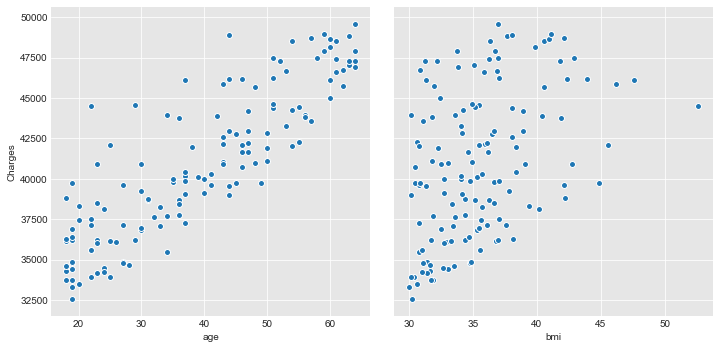

In [45]:
sns.pairplot(data=insurance_smoker2,x_vars=['age','bmi'],y_vars=['Charges'],size=5)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     616.0
Date:                Tue, 28 Aug 2018   Prob (F-statistic):           8.78e-78
Time:                        23:17:41   Log-Likelihood:                -1163.2
No. Observations:                 137   AIC:                             2334.
Df Residuals:                     133   BIC:                             2346.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.386e+04    925.706     14.968      0.0

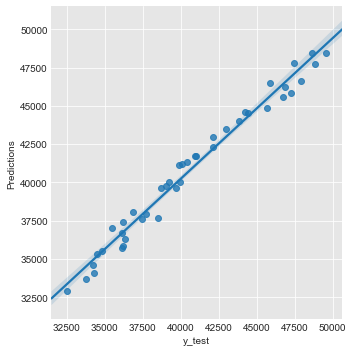

In [46]:
X =insurance_smoker2.iloc[:,:-1].drop(labels='smoker_yes',axis=1)
Y = insurance_smoker2.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we saw great accuracy when we are predicting the model using smoker and bmi >30
* model score: 0.97379226592798212

**Model 2.2 : Non-Smoker**

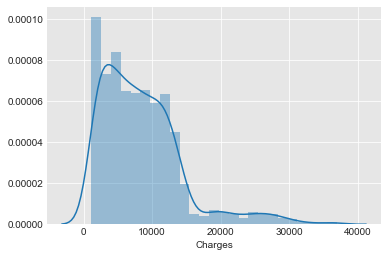

In [47]:
sns.distplot(insurance_nonsmoker['Charges'])

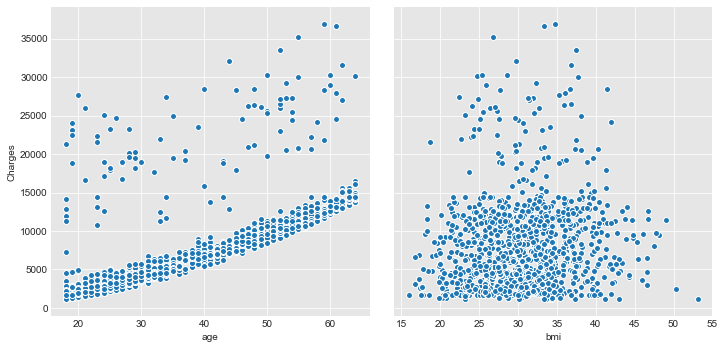

In [48]:
sns.pairplot(data=insurance_nonsmoker,x_vars=['age','bmi'],y_vars=['Charges'],size=5)
plt.show()

Outliers:

In [49]:
insurance_nonsmoker[insurance_nonsmoker['Charges']>15000]

,age,bmi,children,smoker_yes,Charges
3,33,22.705,0,0,21984.47061
9,60,25.840,0,0,28923.13692
36,62,32.965,3,0,15612.19335
45,55,37.300,0,0,20630.28351
62,64,24.700,1,0,30166.61817
102,18,30.115,0,0,21344.84670
115,60,28.595,0,0,30259.99556
138,54,31.900,3,0,27322.73386
140,34,22.420,2,0,27375.90478
143,29,29.735,2,0,18157.87600


In [50]:
outliers3 = insurance_nonsmoker[insurance_nonsmoker['Charges']>15000].shape[0]

In [51]:
outliers3

91

Removing outliers in data

In [52]:
insurance_nonsmoker.drop(index=insurance_nonsmoker[insurance_nonsmoker['Charges']>15000].index,inplace=True)

In [53]:
insurance_nonsmoker.shape

(973, 5)

* Fit model without bmi as it is not impacting output when person is nonsmoker

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     3576.
Date:                Tue, 28 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:17:43   Log-Likelihood:                -8376.2
No. Observations:                 973   AIC:                         1.676e+04
Df Residuals:                     970   BIC:                         1.677e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3307.1262    131.118    -25.223      0.0

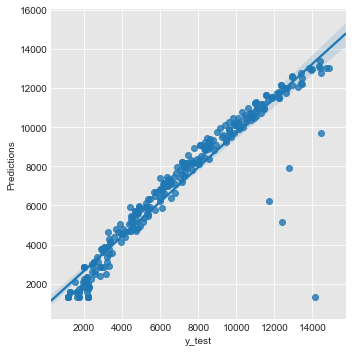

In [54]:
X =insurance_nonsmoker.iloc[:,:-1].drop(labels=['smoker_yes','bmi'],axis=1)
Y = insurance_nonsmoker.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we saw great accuracy when we are predicting the model using nonsmoker and charges <15k
* model score: 0.8987033216908792

**Total Accuracy : **average of models 2.1.1,2.1.2 and 2.2 accuracies together

In [55]:
round(np.array([0.96,0.97,0.90]).mean(),2)

0.94

**Outliers percentage:**

In [56]:
Outliers = outlier1 + outliers2 +outliers3

In [57]:
round((Outliers/df.shape[0])*100)

8

### we achived 94% accurancy by loosing 8% outliers in data.

**Prediction function:**

In [58]:
def predict_charges(age,bmi,children,smoker) :
    if smoker=='no' :
        return -3223.5219302010264+253.53158536*age+405.63759515*children
    elif smoker=='yes' and bmi <=30 :
        return 787.8240554537115+242.74485164*age+411.58330972*bmi+200.5517022*children
    elif smoker=='yes' and bmi > 30 :
        return 14082.592250860536+259.1458006*age+459.72205277*bmi+401.30384337*children

Test cases:

In [59]:
predict_charges(27,30,0,'no')

3621.8308745189734

In [60]:
predict_charges(40,35,2,'yes')

41341.30380855053